## The Office EDA

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
from statsmodels.stats.proportion import proportions_ztest

plt.style.use('ggplot')

In [2]:
# Get the data
df = pd.read_csv('Data/final_office.csv')

In [3]:
df = df.drop(['Unnamed: 0', 'index'], axis=1)

In [4]:
df_rat = df.groupby(['season']).mean('averageRating').reset_index()

In [5]:
df['dialog_len'] = df['text'].map(str).apply(len)

In [6]:
df = df.drop(['episode', 'episode_name', 'director', 'writer', 'text', 'numVotes', 'averageRating'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51792 entries, 0 to 51791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      51792 non-null  int64 
 1   character   51792 non-null  object
 2   dialog_len  51792 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [8]:
# Get top 6 characters across all seasons by dialog len
df_top6 = df.groupby(['character']).sum().sort_values(by='dialog_len', ascending=False).iloc[:6] \
            .drop(['season'], axis=1)

In [9]:
df_top6

,dialog_len
character,
Michael,713101
Dwight,366480
Jim,275366
Andy,217827
Pam,216164
Angela,64605


In [10]:
# get total dialog per season
df_total_season_dialog = df.groupby('season').sum()

In [11]:
df_total_season_dialog = df_total_season_dialog.rename(columns={'dialog_len': 'total_dialog_len'})
df_total_season_dialog

,total_dialog_len
season,
1,87728
2,311666
3,312898
4,194724
5,367262
6,398785
7,367806
8,364184
9,360176


In [12]:
# Split data into top 6 characters
df_Michael = df[df['character']=='Michael'].groupby('season').sum()
df_Dwight = df[df['character']=='Dwight'].groupby('season').sum()
df_Jim = df[df['character']=='Jim'].groupby('season').sum()
df_Andy = df[df['character']=='Andy'].groupby('season').sum()
df_Pam = df[df['character']=='Pam'].groupby('season').sum()
df_Angela = df[df['character']=='Angela'].groupby('season').sum()

In [13]:
# add column in each df_<character> for the percent of dialog in that season by merging with the df_total_season_dialog
# if the character was not at all in a season then fillna with 0

#Michael
df_Michael = pd.concat([df_Michael, df_total_season_dialog], axis=1).fillna(0)
# calculate the percentage dialo per season 
df_Michael['pct_season_dialog'] = round(df_Michael['dialog_len'] / df_Michael['total_dialog_len'] * 100, 1)
# and drop the unneeded columns
df_Michael = df_Michael.drop(['dialog_len', 'total_dialog_len'], axis=1)
df_Michael = df_Michael.reset_index()

#Dwight
df_Dwight = pd.concat([df_Dwight, df_total_season_dialog], axis=1).fillna(0)
# calculate the percentage dialo per season 
df_Dwight['pct_season_dialog'] = round(df_Dwight['dialog_len'] / df_Dwight['total_dialog_len'] * 100, 1)
# and drop the unneeded columns
df_Dwight = df_Dwight.drop(['dialog_len', 'total_dialog_len'], axis=1)
df_Dwight = df_Dwight.reset_index()

#Jim
df_Jim = pd.concat([df_Jim, df_total_season_dialog], axis=1).fillna(0)
# calculate the percentage dialo per season 
df_Jim['pct_season_dialog'] = round(df_Jim['dialog_len'] / df_Jim['total_dialog_len'] * 100, 1)
# and drop the unneeded columns
df_Jim = df_Jim.drop(['dialog_len', 'total_dialog_len'], axis=1)
df_Jim = df_Jim.reset_index()

#Andy
df_Andy = pd.concat([df_Andy, df_total_season_dialog], axis=1).fillna(0)
# calculate the percentage dialo per season 
df_Andy['pct_season_dialog'] = round(df_Andy['dialog_len'] / df_Andy['total_dialog_len'] * 100, 1)
# and drop the unneeded columns
df_Andy = df_Andy.drop(['dialog_len', 'total_dialog_len'], axis=1)
df_Andy = df_Andy.reset_index()

#Pam
df_Pam = pd.concat([df_Pam, df_total_season_dialog], axis=1).fillna(0)
# calculate the percentage dialo per season 
df_Pam['pct_season_dialog'] = round(df_Pam['dialog_len'] / df_Pam['total_dialog_len'] * 100, 1)
# and drop the unneeded columns
df_Pam = df_Pam.drop(['dialog_len', 'total_dialog_len'], axis=1)
df_Pam = df_Pam.reset_index()

#Angela
df_Angela = pd.concat([df_Angela, df_total_season_dialog], axis=1).fillna(0)
# calculate the percentage dialo per season 
df_Angela['pct_season_dialog'] = round(df_Angela['dialog_len'] / df_Angela['total_dialog_len'] * 100, 1)
# and drop the unneeded columns
df_Angela = df_Angela.drop(['dialog_len', 'total_dialog_len'], axis=1)
df_Angela = df_Angela.reset_index()

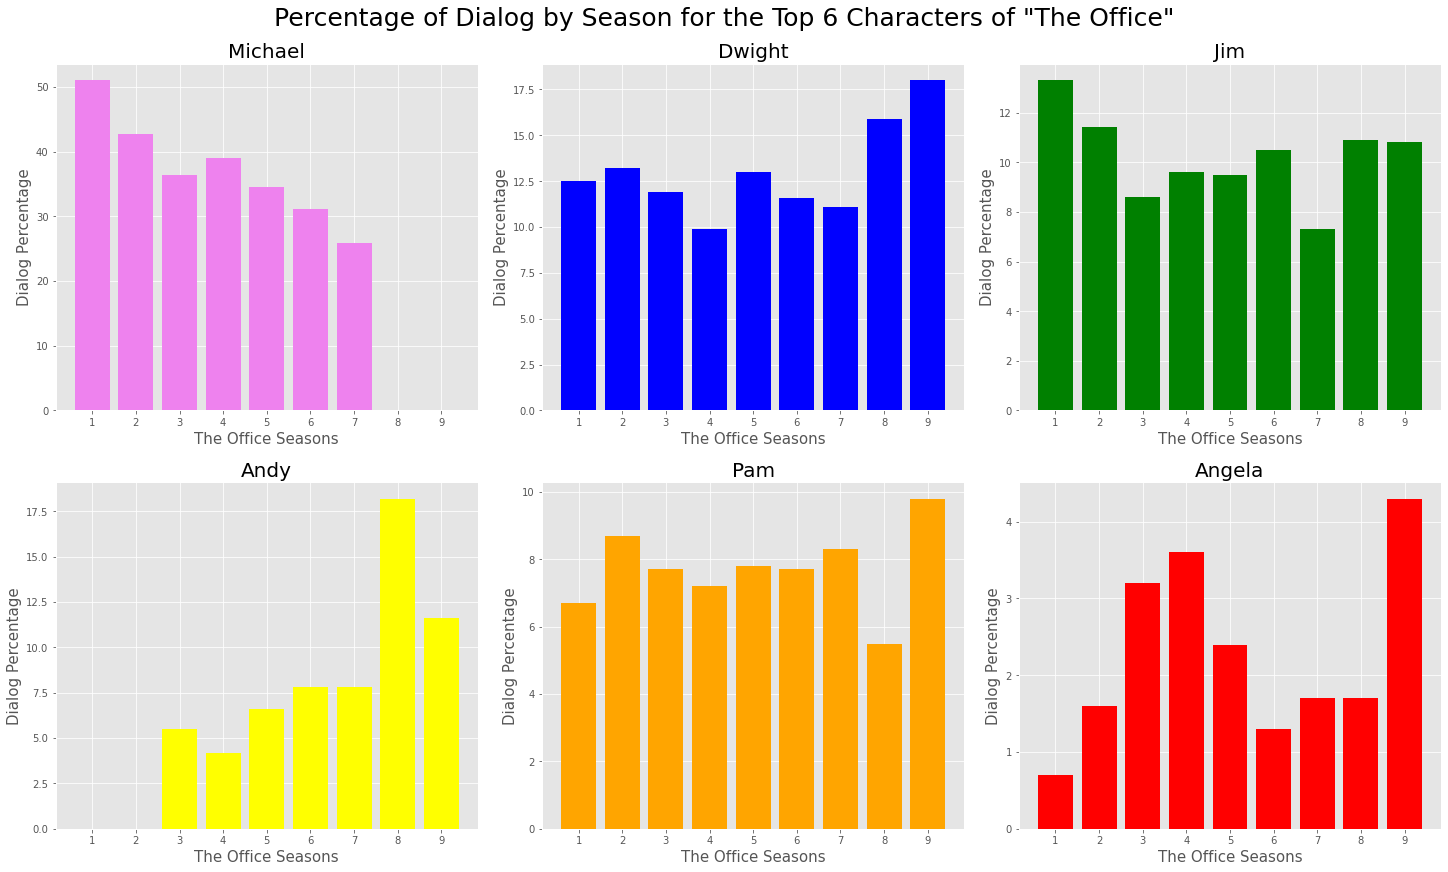

In [14]:
fig, ax1 = plt.subplots(2, 3, figsize=(20,12), constrained_layout=True)

fig.suptitle('Percentage of Dialog by Season for the Top 6 Characters of "The Office"', fontsize=25)
# fig.tight_layout()

#Michael
ax1[0,0].set_title('Michael', fontsize=20)
ax1[0,0].set_xlabel('The Office Seasons', fontsize=15)
ax1[0,0].set_ylabel('Dialog Percentage', fontsize=15)
ax1[0,0].set_xticks(df_Michael['season'])
_ = ax1[0,0].bar(df_Michael['season'], df_Michael['pct_season_dialog'], color='violet')

#Dwight
ax1[0,1].set_title('Dwight', fontsize=20)
ax1[0,1].set_xlabel('The Office Seasons', fontsize=15)
ax1[0,1].set_ylabel('Dialog Percentage', fontsize=15)
ax1[0,1].set_xticks(df_Dwight['season'])
_ = ax1[0,1].bar(df_Dwight['season'], df_Dwight['pct_season_dialog'], color='blue')

#Jim
ax1[0,2].set_title('Jim', fontsize=20)
ax1[0,2].set_xlabel('The Office Seasons', fontsize=15)
ax1[0,2].set_ylabel('Dialog Percentage', fontsize=15)
ax1[0,2].set_xticks(df_Jim['season'])
_ = ax1[0,2].bar(df_Jim['season'], df_Jim['pct_season_dialog'], color='green')

#Andy
ax1[1,0].set_title('Andy', fontsize=20)
ax1[1,0].set_xlabel('The Office Seasons', fontsize=15)
ax1[1,0].set_ylabel('Dialog Percentage', fontsize=15)
ax1[1,0].set_xticks(df_Andy['season'])
_ = ax1[1,0].bar(df_Andy['season'], df_Andy['pct_season_dialog'], color='yellow')

#Pam
ax1[1,1].set_title('Pam', fontsize=20)
ax1[1,1].set_xlabel('The Office Seasons', fontsize=15)
ax1[1,1].set_ylabel('Dialog Percentage', fontsize=15)
ax1[1,1].set_xticks(df_Pam['season'])
_ = ax1[1,1].bar(df_Pam['season'], df_Pam['pct_season_dialog'], color='orange')

#Angela
ax1[1,2].set_title('Angela', fontsize=20)
ax1[1,2].set_xlabel('The Office Seasons', fontsize=15)
ax1[1,2].set_ylabel('Dialog Percentage', fontsize=15)
ax1[1,2].set_xticks(df_Angela['season'])
_ = ax1[1,2].bar(df_Angela['season'], df_Angela['pct_season_dialog'], color='red')

# fig.tight_layout()
plt.savefig('Images/Top_6_Characters_Dialog_Percentage')
    

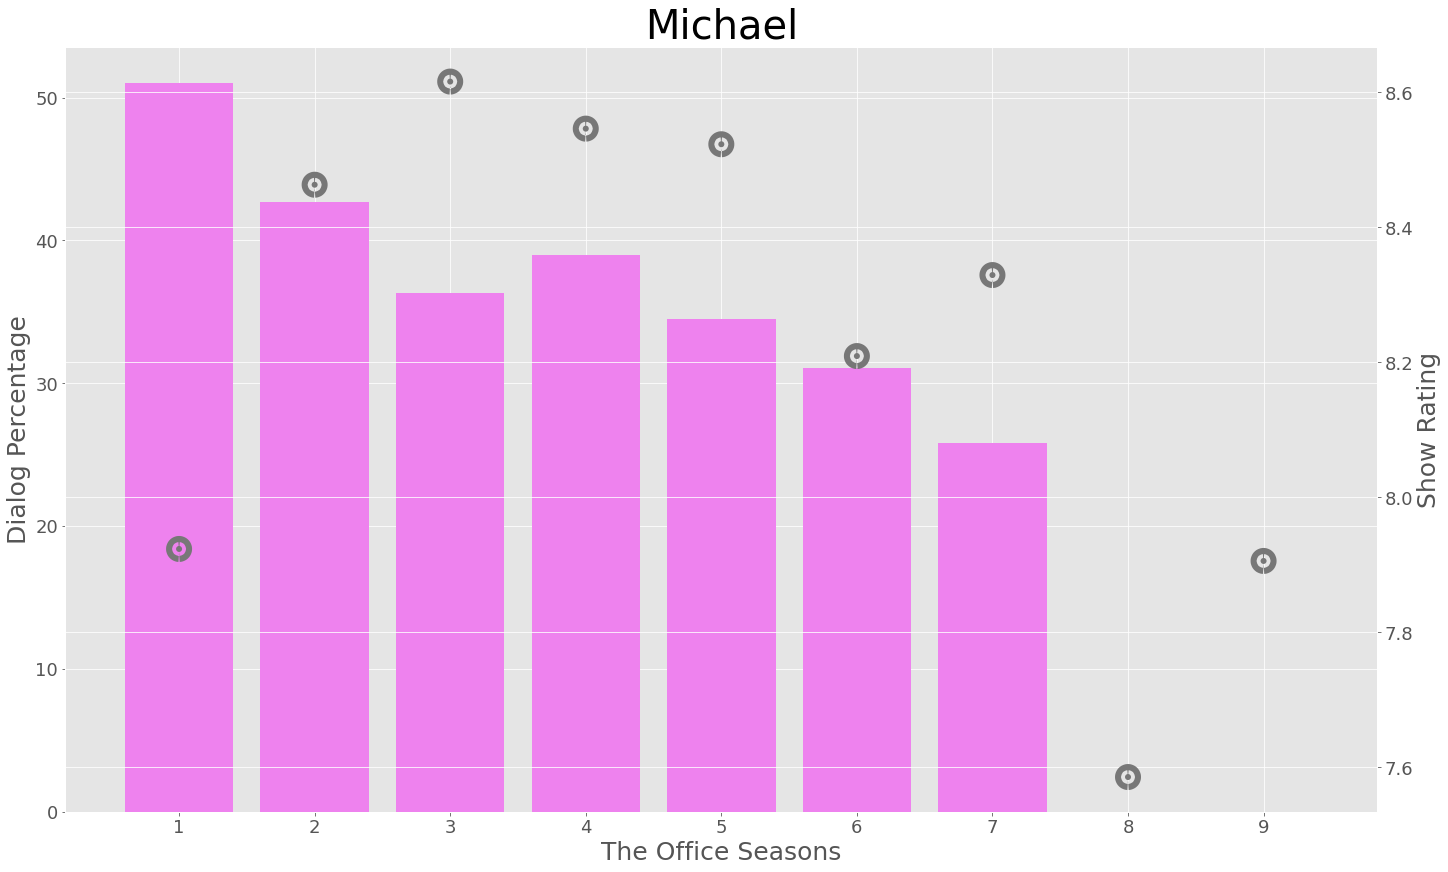

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax1 = plt.subplots(figsize=(20,12), constrained_layout=True)

#Michael
ax1.set_title('Michael', fontsize=40)
ax1.set_xlabel('The Office Seasons', fontsize=25)
ax1.set_ylabel('Dialog Percentage', fontsize=25)
ax1.set_xticks(df_Michael['season'])
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

_ = ax1.bar(df_Michael['season'], df_Michael['pct_season_dialog'], color='violet')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.scatter(df_rat['season'],df_rat['averageRating'], color='C3', marker='o', linestyle='dashed',linewidth=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Show Rating', fontsize=25)
plt.show()

plt.savefig('Images/Michael')

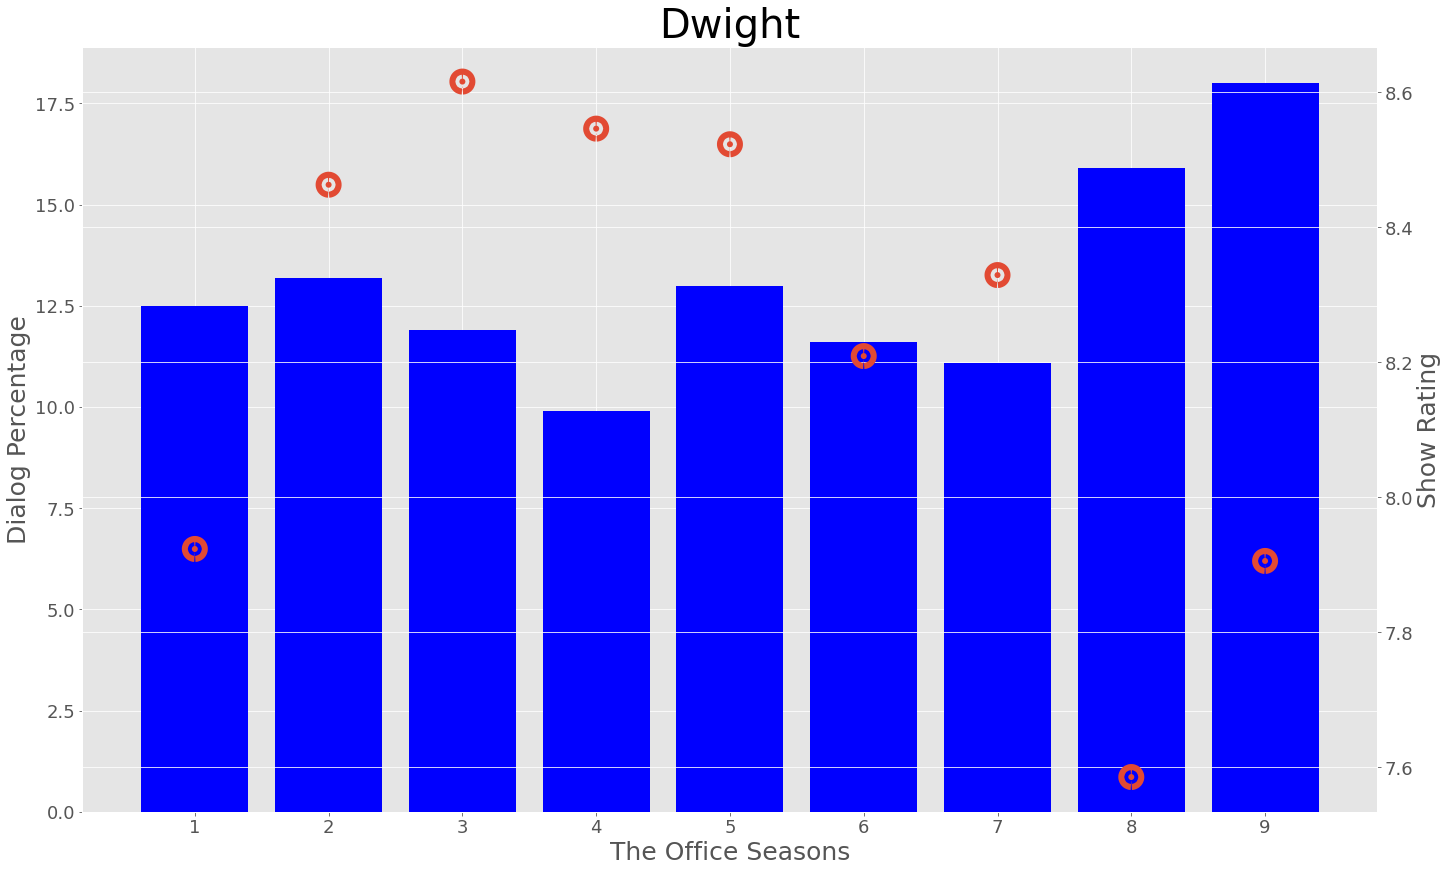

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax1 = plt.subplots(figsize=(20,12), constrained_layout=True)

#Michael
ax1.set_title('Dwight', fontsize=40)
ax1.set_xlabel('The Office Seasons', fontsize=25)
ax1.set_ylabel('Dialog Percentage', fontsize=25)
ax1.set_xticks(df_Dwight['season'])
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

_ = ax1.bar(df_Dwight['season'], df_Dwight['pct_season_dialog'], color='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.scatter(df_rat['season'],df_rat['averageRating'], color='C0', marker='o', linestyle='dashed',linewidth=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Show Rating', fontsize=25)
plt.show()

plt.savefig('Images/Dwight')

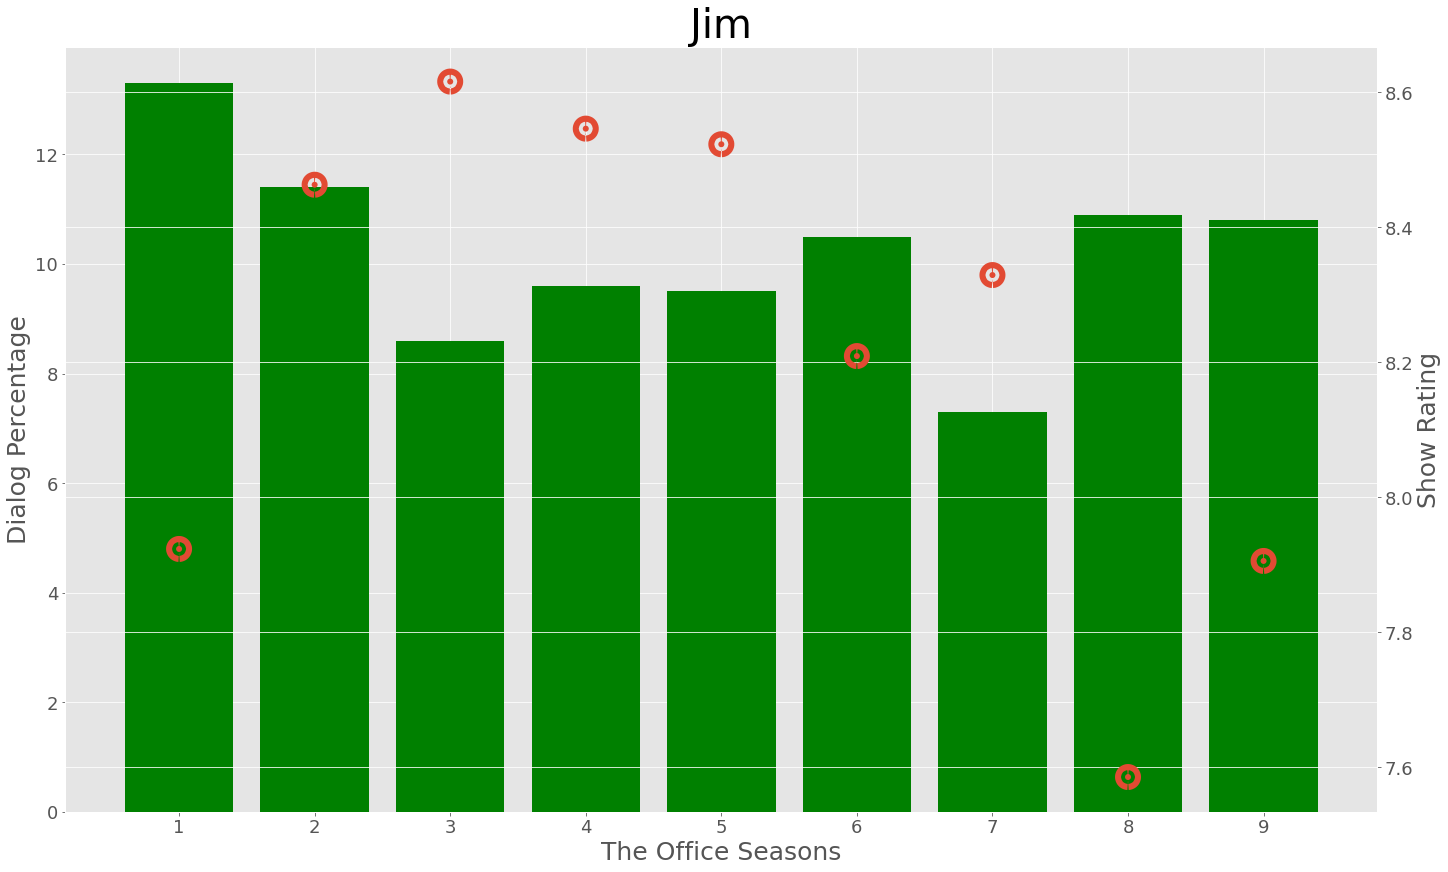

<Figure size 432x288 with 0 Axes>

In [17]:
fig, ax1 = plt.subplots(figsize=(20,12), constrained_layout=True)

#Michael
ax1.set_title('Jim', fontsize=40)
ax1.set_xlabel('The Office Seasons', fontsize=25)
ax1.set_ylabel('Dialog Percentage', fontsize=25)
ax1.set_xticks(df_Jim['season'])
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

_ = ax1.bar(df_Jim['season'], df_Jim['pct_season_dialog'], color='green')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.scatter(df_rat['season'],df_rat['averageRating'], color='C0', marker='o', linestyle='dashed',linewidth=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Show Rating', fontsize=25)
plt.show()

plt.savefig('Images/Jim')

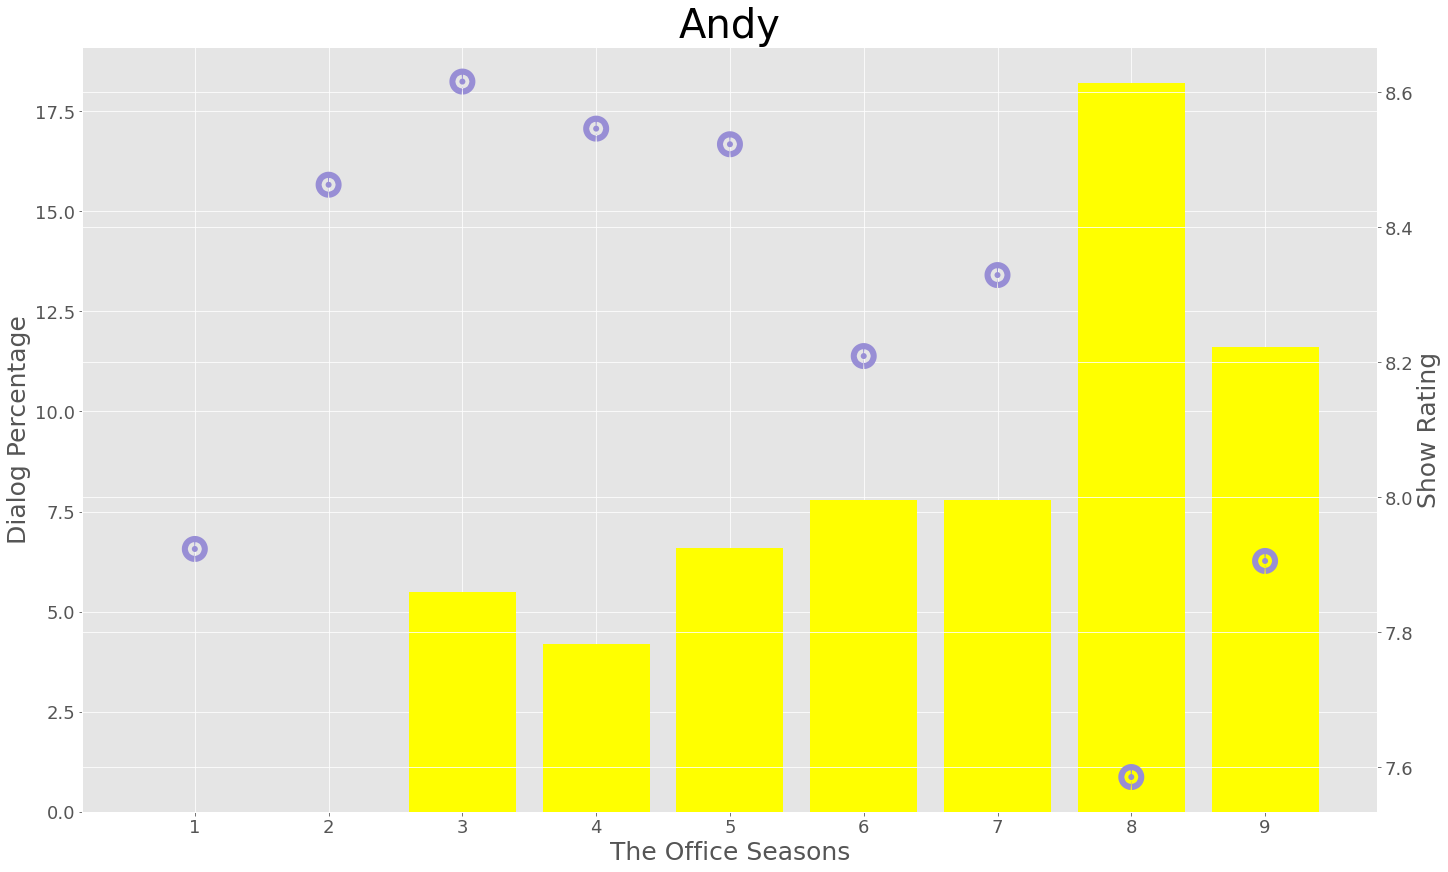

<Figure size 432x288 with 0 Axes>

In [18]:
fig, ax1 = plt.subplots(figsize=(20,12), constrained_layout=True)

#Michael
ax1.set_title('Andy', fontsize=40)
ax1.set_xlabel('The Office Seasons', fontsize=25)
ax1.set_ylabel('Dialog Percentage', fontsize=25)
ax1.set_xticks(df_Andy['season'])
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

_ = ax1.bar(df_Andy['season'], df_Andy['pct_season_dialog'], color='yellow')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.scatter(df_rat['season'],df_rat['averageRating'], color='C2', marker='o', linestyle='dashed',linewidth=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Show Rating', fontsize=25)
plt.show()

plt.savefig('Images/Andy')

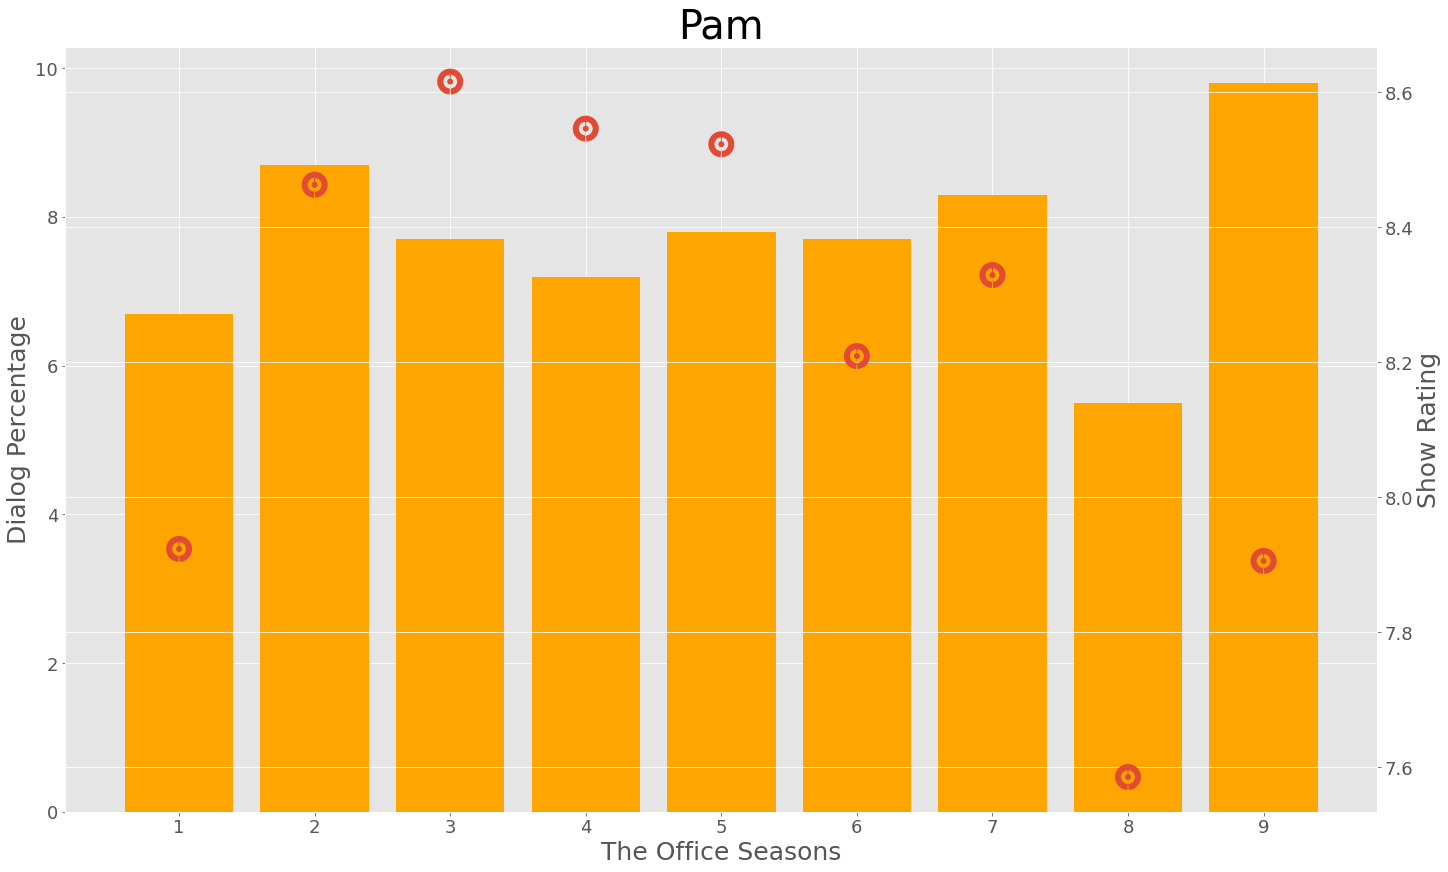

<Figure size 432x288 with 0 Axes>

In [19]:
fig, ax1 = plt.subplots(figsize=(20,12), constrained_layout=True)

#Michael
ax1.set_title('Pam', fontsize=40)
ax1.set_xlabel('The Office Seasons', fontsize=25)
ax1.set_ylabel('Dialog Percentage', fontsize=25)
ax1.set_xticks(df_Pam['season'])
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

_ = ax1.bar(df_Pam['season'], df_Pam['pct_season_dialog'], color='orange')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.scatter(df_rat['season'],df_rat['averageRating'], color='C7', marker='o', linestyle='dashed',linewidth=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Show Rating', fontsize=25)
plt.show()

plt.savefig('Images/Pam')

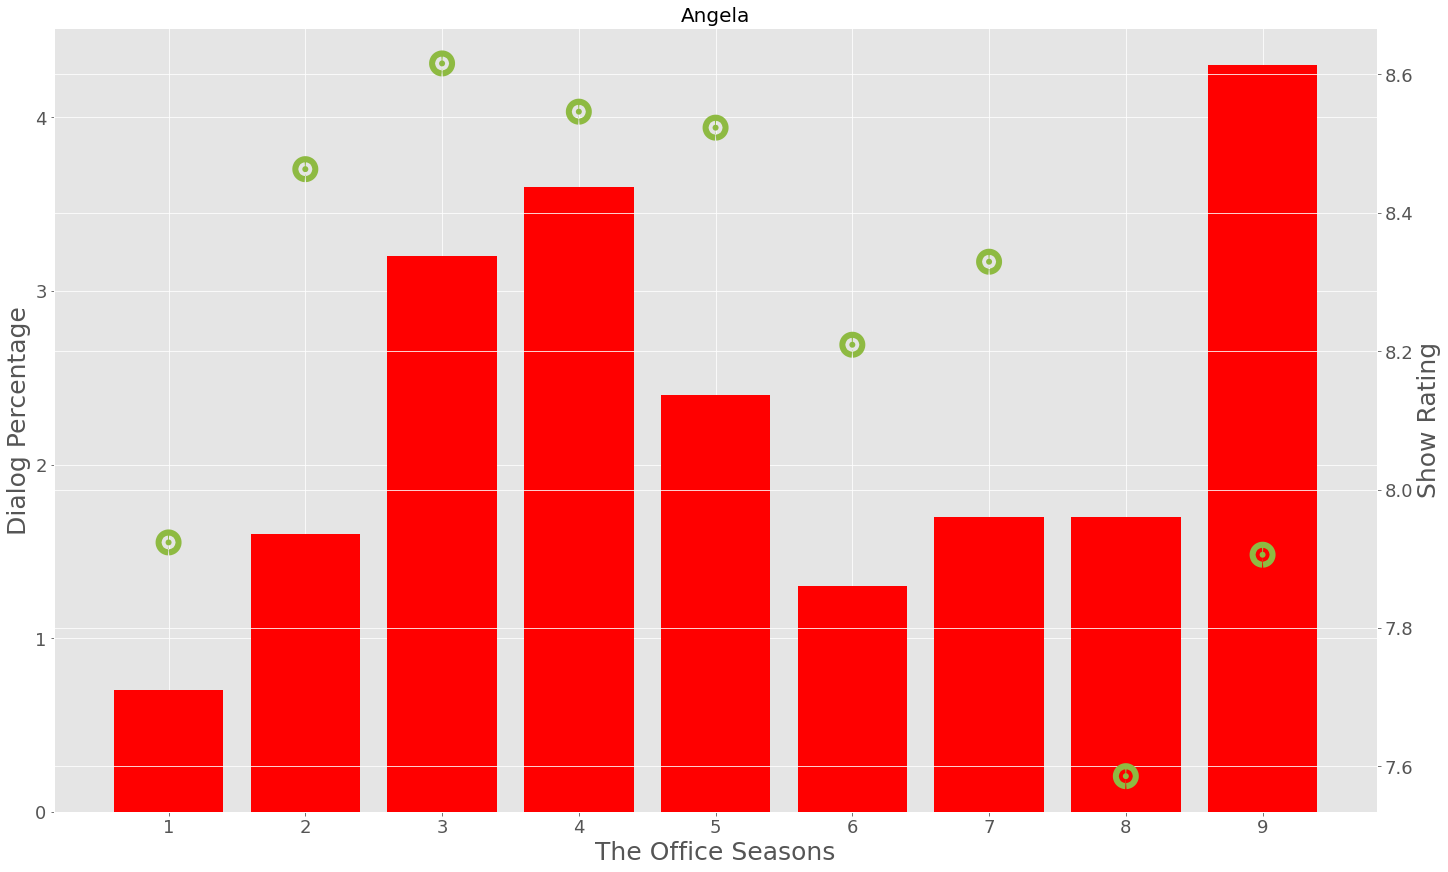

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax1 = plt.subplots(figsize=(20,12), constrained_layout=True)

#Michael
ax1.set_title('Angela', fontsize=20)
ax1.set_xlabel('The Office Seasons', fontsize=25)
ax1.set_ylabel('Dialog Percentage', fontsize=25)
ax1.set_xticks(df_Angela['season'])
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

_ = ax1.bar(df_Angela['season'], df_Angela['pct_season_dialog'], color='red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.scatter(df_rat['season'],df_rat['averageRating'], color='C5', marker='o', linestyle='dashed',linewidth=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Show Rating', fontsize=25)
plt.show()

plt.savefig('Images/Angela')